In [1]:
#This is the notebook for ASTR 19 Group Project.


In [2]:
#import basics
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import tensorflow as tf

In [3]:
#Upload text data
#named the text fname, to make calling it easier.
fname = 'ASTR19_S22_group_project_data.txt'
#data = np.genfromtxt(fname, dtype=None) #another variation to call, text, ignore.
data = np.loadtxt(fname,dtype=np.ndarray) #loaded the data as an array, named it data.
print(data)

[['1' '8:07' '6.57']
 ['1' '15:37' '-0.39']
 ['2' '8:55' '5.38']
 ['2' '16:25' '-1.74']
 ['3' '9:45' '5.26']
 ['3' '17:14' '-1.36']
 ['4' '10:35' '4.13']
 ['4' '18:00' '-1.15']
 ['5' '11:28' '3.48']
 ['5' '18:46' '-1.61']
 ['6' '12:22' '2.62']
 ['6' '19:31' '0.05']
 ['7' '13:24' '1.83']
 ['7' '20:16' '1.01']
 ['8' '3:22' '3.57']
 ['8' '21:01' '0.73']
 ['9' '4:07' '4.54']
 ['9' '21:46' '2.17']
 ['10' '4:50' '3.76']
 ['10' '11:58' '2.88']
 ['11' '5:31' '3.90']
 ['11' '12:56' '1.92']
 ['12' '6:08' '4.73']
 ['12' '13:45' '1.74']
 ['13' '6:47' '5.66']
 ['13' '14:25' '0.79']
 ['14' '7:22' '5.33']
 ['14' '15:00' '-0.04']
 ['15' '7:59' '5.23']
 ['15' '15:34' '-1.12']
 ['16' '8:34' '6.67']
 ['16' '16:08' '-0.61']
 ['17' '9:10' '4.74']
 ['17' '16:41' '-0.93']
 ['18' '9:45' '4.69']
 ['18' '17:12' '-1.29']
 ['19' '10:21' '4.20']
 ['19' '17:45' '0.22']
 ['20' '10:57' '3.68']
 ['20' '18:15' '0.26']
 ['21' '11:38' '2.47']
 ['21' '18:48' '0.36']
 ['22' '12:25' '2.59']
 ['22' '19:20' '0.99']
 ['23' '2:

In [4]:
x = []
y = []

for entry in data:
    time = float(entry[1].replace(":", "")) / 2400.0
    date = float(entry[0]) + time
    
    x.append(date)
    y.append(float(entry[2]))

x = np.array(x)
y = np.array(y)

[ 1.33625     1.64041667  2.35625     2.67708333  3.39375     3.71416667
  4.43125     4.75        5.47        5.76916667  6.50916667  6.80458333
  7.55166667  7.84        8.13416667  8.87541667  9.16958333  9.89416667
 10.1875     10.4825     11.22125    11.52333333 12.25333333 12.56041667
 13.26958333 13.59375    14.30083333 14.625      15.31625    15.63916667
 16.3475     16.67       17.37916667 17.68375    18.39375    18.71333333
 19.42541667 19.72708333 20.44041667 20.75625    21.47416667 21.77
 22.51041667 22.8        23.0925     23.81333333 24.1075     24.84583333
 25.14041667 25.435      26.17625    26.48125    27.21458333 27.52375
 28.25375    28.5625     29.29375    29.59958333 30.31583333 30.63625
 31.35416667 31.67083333 32.39166667 32.68833333 33.42916667 33.7225
 34.46625    34.755      35.50416667 35.77041667 36.055      36.80166667
 37.08875    37.83333333 38.10583333 38.3975     39.14125    39.46458333
 40.17875    40.50916667 41.21708333 41.5475    ]
[ 6.57 -0.39  5.3

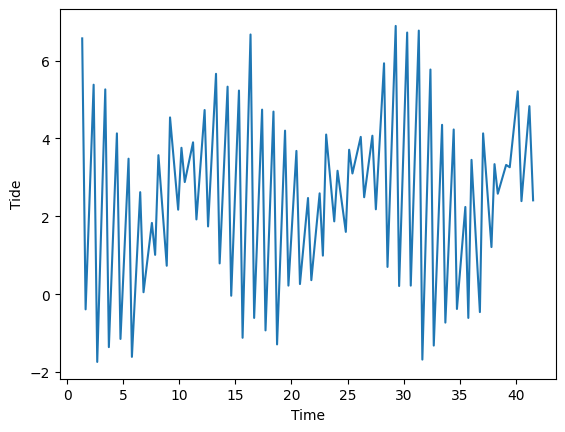

In [5]:
plt.plot(x, y)

plt.xlabel("Time")
plt.ylabel("Tide")
print(x)
print(y)

Text(0, 0.5, 'Tide')

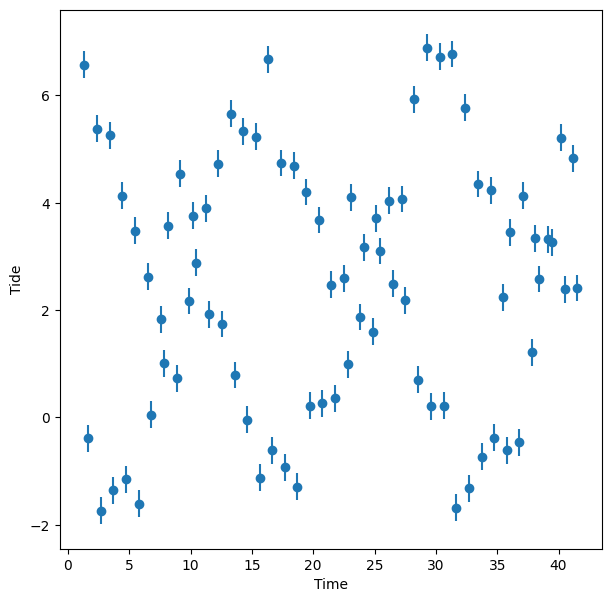

In [6]:
npoints = len(data)

sig = 0.25

y_err = np.full(npoints, sig)

f = plt.figure(figsize=(7, 7))

plt.errorbar(x, y, yerr=y_err, fmt="o")
plt.xlabel("Time")
plt.ylabel("Tide")

2.0000000000000004 30.09912145181257 2.0000000000000004 2.359817688402631
2.0000000000000004
30.09912145181257
2.0000000000000004
2.359817688402631


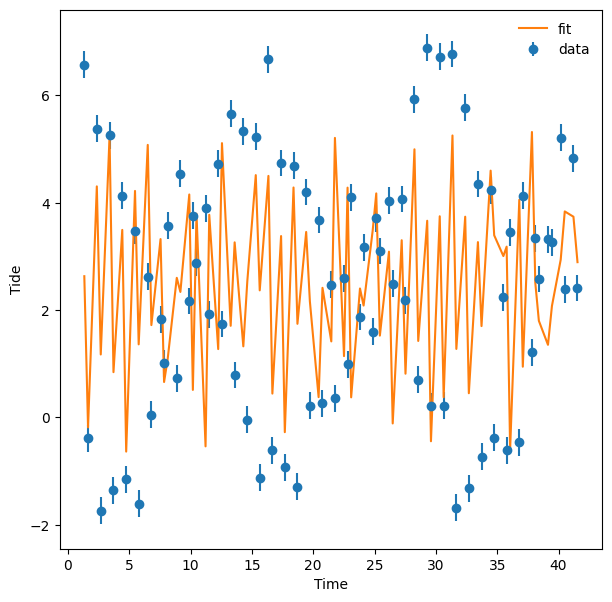

In [7]:
a = 2.0 #increases vertical size
b = 30.0 #increases horizontal squish
c = 2.0 #increases horizontal squish
d = 2.0 #raises it up
bounds = ([], [])

def guess(x, a, b, c, d):
    return a * np.sin(b * x) + np.cos(c * x) + d

params, params_cov = optimize.curve_fit(guess, x, y, sigma=y_err, p0=[a, b, c, d], bounds=([2, 29.0, 2.0, 2.0], [10, 35.0, 3.0, 3.0]))

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = guess(x, a_fit, b_fit, c_fit, d_fit)

f = plt.figure(figsize=(7, 7))
print(a_fit)
print(b_fit)
print(c_fit)
print(d_fit)

plt.errorbar(x, y, yerr=y_err, fmt="o", label="data")
plt.plot(x, y_fit, label="fit")
#plt.plot(x, guess(x, a, b, c, d), label="fit")
plt.xlabel("Time")
plt.ylabel("Tide")
plt.legend(loc=0, frameon=False)

#lets try the training. FROM SLIDES

#amplitude
A_init = 2.0
A_fit = tf.Variable(A_init,name='amplitude')

#frequency
f_init = 5.0
f_fit = tf.Variable(f_init,name='frequency')

#phase
p_init = 0.5
p_fit = tf.Variable(p_init,name='phase')




In [16]:
#lets try the training. 

#amplitude
A_init = 2.0
A_fit = tf.Variable(A_init,name='amplitude')

#frequency
B_init = 5.0
B_fit = tf.Variable(f_init,name='frequency')

#phase
C_init = 0.5
C_fit = tf.Variable(p_init,name='phase')

D_init = 2.0
D_fit = tf.Variable(D_init,name='huh')



In [17]:
#define the model for tensorflow to fit
#a * np.sin(b * x) + np.cos(c * x) + d
@tf.function
def our_model(j):
    return A_fit * tf.math.sin(B_fit * j) + tf.math.cos(C_fit * j) + D_fit

#define the model for tensorflow to fit
#a * np.sin(b * x) + np.cos(c * x) + d
@tf.function
def sinusodial_model(j):
    return A_fit*tf.math.sin(f_fit*j+p_fit)

In [18]:
#define the loss function
@tf.function
def mse(y_true,y_pred):
    #mse (mean squared error) between true and predicted values
    return tf.losses.mean_squared_error(y_true,y_pred)

In [19]:
#Adam Optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

In [21]:
#start training
j = np.asarray(np.random.uniform(low=0,high=40,size=82),dtype=np.float32)
epochs = 5000 #number of epochs to run
display_step = 1000 #number of epochs between printing info to screen

for epoch in range(epochs):

    #monitor training / display steps
    if((epoch%display_step)==0):
        pred=our_model(j)
        loss=mse(pred,y)

        #to print this info, we need to convert to numpy arrays
        print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} B: {B_fit.numpy()} C:{C_fit.numpy()}")

    #In TF2, gradients are handled using the GradientTape class.
    #begin gradienttape and optimize
    with tf.GradientTape() as g:
        pred = our_model(j)
        loss = mse(y,pred)

    #compute dm, db, the gradients with respect to m_fit and b_fit
    gradients = g.gradient(loss, [A_fit,B_fit,C_fit])

    #update m_fit anf b_fit with the gradients x learning
    optimizer.apply_gradients(zip(gradients,[A_fit,B_fit,C_fit]))

#print the last answer
print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} B: {B_fit.numpy()} C:{C_fit.numpy()}")
print("Done!")

Epoch 0 | Loss 8.699724565586722, A: 2.0 B: 5.0 C:0.5
Epoch 1000 | Loss 5.8186044783976465, A: 1.240170955657959 B: 4.931255340576172 C:0.5544139742851257
Epoch 2000 | Loss 5.665894640046867, A: 0.7888994216918945 B: 4.926965236663818 C:0.5478415489196777
Epoch 3000 | Loss 5.655206305633127, A: 0.6482573747634888 B: 4.925708770751953 C:0.5461089611053467
Epoch 4000 | Loss 5.655107151603444, A: 0.6336447596549988 B: 4.925584316253662 C:0.5459380745887756
Epoch 4999 | Loss 5.655106544494629, A: 0.6333858966827393 B: 4.925581455230713 C:0.5459348559379578
Done!


#a sinusodial curve
def sinusoid(j,A,B,C,D):
    return A*np.sin(f*j+C)

In [22]:
x_model = np.sort(j)
y_model = guess(x_model,A_fit,B_fit,C_fit,D_fit)

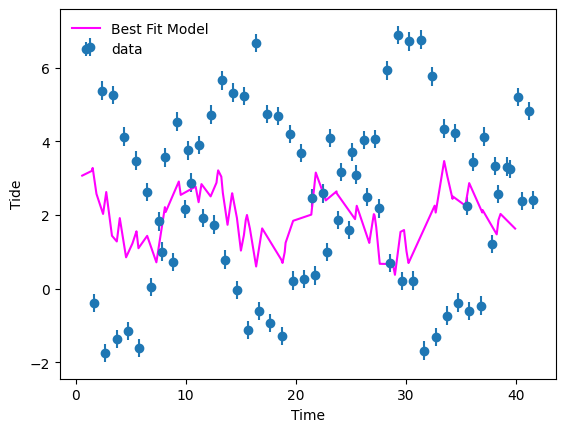

In [23]:
#plot again
plt.errorbar(x, y, yerr=y_err, fmt="o", label="data")
#plt.plot(x, y_fit, label="fit")
plt.plot(x_model,y_model,color='magenta',label='Best Fit Model')
plt.xlabel("Time")
plt.ylabel("Tide")
plt.legend(loc=0, frameon=False)